A : 0.3978
AB : 0.0418
B : 0.1018
0 : 0.4586


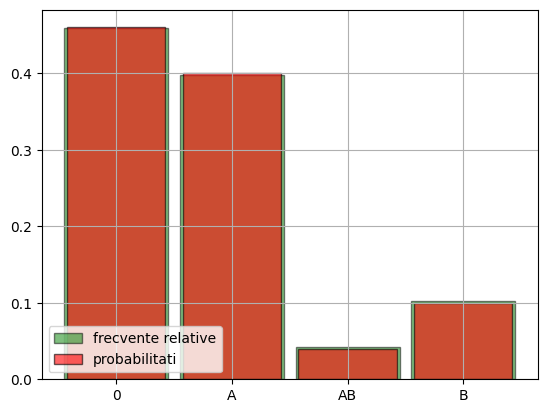

In [2]:
from scipy.stats import uniform
from matplotlib.pyplot import bar, hist, grid, show, legend

def genrand(l):
    curp = 0
    val = uniform.rvs(size=1)
    for x, p in l:
        curp += p
        if val < curp:
            return x
    return l[-1][0]

IT = 5000
results = []

X = [['0',0.46],['A',0.4],['B',0.1],['AB',0.04]]

for _ in range(IT):
    results.append(genrand(X))

for x in set(results):
    print(x, ':', results.count(x) /IT)


data = sorted(results)
bin_edges = [k + 0.5 for k in range(-1,4)]
hist(data, bin_edges, density = True, rwidth = 0.9, color = 'green', edgecolor = 'black', alpha = 0.5, label = 'frecvente relative')
distribution = dict(X)
bar(x=distribution.keys(), height=distribution.values(), width = 0.85, color = 'red', edgecolor = 'black', alpha= 0.6, label = 'probabilitati')
legend(loc = 'lower left')
grid()
show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


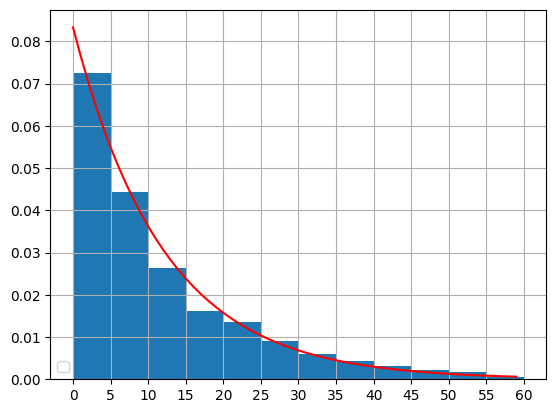

0.639
0.6592406302004438


In [3]:
from matplotlib.pyplot import show, hist, grid, legend, xticks, plot
from scipy.stats import expon
from math import log

ALPHA = 1/12

def finv(x):
    return -log(1-x)/ALPHA


IT = 1000

results = []

def genrandexp():
    return finv(uniform.rvs(size=1))

for _ in range(IT):
    results.append(genrandexp())


data=results
hist(data, bins=12, density = True,range=(0,60))
x = range(60)
plot(x,expon.pdf(x,loc=0,scale=1/ALPHA),'r-')
xticks(range(0,65,5))
legend(loc = 'lower left')
grid()
show()

print((sum(x>=5 for x in results))/IT)
print(1-expon.cdf(x=5,loc=0,scale=1/ALPHA))